In [1]:
from scapy.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [25]:
paquetes = rdpcap('../datos/sniff_casa_fede.cap')

In [53]:
paquetes = rdpcap('../datos/sniff_wifi_labo_filtrado.cap')

In [47]:
paquetes = rdpcap('../datos/sniff_casa_franco.cap')

In [55]:
lengthWhoHasPackets=0
paquetes = paquetes[ARP]
freq = {}

for pkt in paquetes:
    tipo = 'who-has' if pkt.op == 1 else 'is-at'
    if tipo == 'who-has':
        ip = pkt.pdst
        lengthWhoHasPackets=lengthWhoHasPackets+1
    else:
        ip = pkt.psrc

    if tipo == 'who-has':
        freq[ip] = freq[ip] + 1 if ip in freq else 1

In [56]:
#La tabla debe contener
#<ip,informacion del simbolo, probabilidad del simbolo>
#Entropia  y entropia maxima
#print(" Indice  | IP               | Probabilidad    | Informacion     ")
print(" "+"{:<7}".format("Indice")+" | "+"{:<15}".format("IP")+" | "+"{:<18}".format("Probabilidad")+" | "+"{:<18}".format("Informacion"))
entropia = 0
indice =0
ipDistinguida=list(freq.keys())[0]
for _ip in freq:
        p = (float)( freq[_ip]) / (float) (lengthWhoHasPackets)
        i = (float) (-1) * (float)(math.log(p,2))
        entropia += p * i
        indice = indice +1
        if freq[_ip] > freq[ipDistinguida]:
            ipDistinguida=_ip
        print(" "+"{:<7}".format(str(indice))+" | "+"{:<15}".format(str(_ip))+" | "+"{:<18}".format(str(p))+" | "+"{:<18}".format(str(i)))
max_entropia = math.log(len(freq),2)
print("H(S2)="+str(entropia))
print("Max_H(S2)="+str(max_entropia))
print("Ip distinguida: "+ ipDistinguida +" | Cantidad de apariciones: "+str(freq[ipDistinguida]))
print(freq)


 Indice  | IP              | Probabilidad       | Informacion       
 1       | 10.2.203.254    | 0.6559139784946236 | 0.6084214735451452
 2       | 10.2.202.252    | 0.007168458781362007 | 7.124121311829187 
 3       | 10.2.203.106    | 0.2078853046594982 | 2.2661403167016156
 4       | 10.2.203.72     | 0.0035842293906810036 | 8.124121311829187 
 5       | 10.2.200.242    | 0.0023894862604540022 | 8.709083812550343 
 6       | 10.2.202.57     | 0.0035842293906810036 | 8.124121311829187 
 7       | 10.2.201.142    | 0.0035842293906810036 | 8.124121311829187 
 8       | 10.2.201.37     | 0.0023894862604540022 | 8.709083812550343 
 9       | 10.2.201.97     | 0.0035842293906810036 | 8.124121311829187 
 10      | 10.2.202.114    | 0.005973715651135006 | 7.387155717662981 
 11      | 10.2.200.213    | 0.007168458781362007 | 7.124121311829187 
 12      | 10.2.202.2      | 0.0023894862604540022 | 8.709083812550343 
 13      | 10.2.201.13     | 0.013142174432497013 | 6.249652193913047 
 14  

In [16]:
paquetes.conversations()

In [57]:
tablainfo = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes")
tablainfo.index = tablainfo.index.set_names(["Ip"])
tablainfo['Probabilidad'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: x / len(paquetes))
tablainfo['Información [Bits]'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: np.log(len(paquetes)/x))
tablainfo.sort_values('Información [Bits]', inplace = True, ascending = False)
print(tablainfo)
print()
print(tablainfo.to_latex())

              Cantidad de Paquetes  Probabilidad  Información [Bits]
Ip                                                                  
10.2.201.44                      1      0.001103            6.810142
10.2.203.108                     1      0.001103            6.810142
10.2.201.16                      1      0.001103            6.810142
10.2.200.205                     1      0.001103            6.810142
10.2.201.3                       1      0.001103            6.810142
10.2.201.37                      2      0.002205            6.116995
10.2.203.118                     2      0.002205            6.116995
10.2.200.242                     2      0.002205            6.116995
10.2.202.2                       2      0.002205            6.116995
10.2.201.175                     2      0.002205            6.116995
10.2.202.57                      3      0.003308            5.711530
10.2.201.97                      3      0.003308            5.711530
10.2.201.69                      3

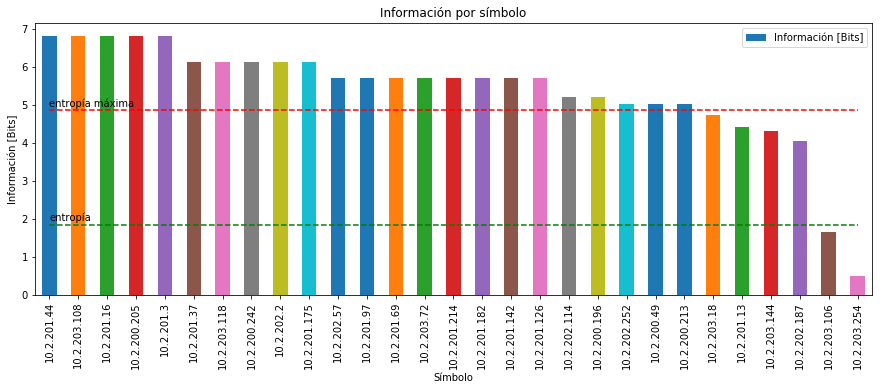

In [59]:
ax = tablainfo.plot(y = 'Información [Bits]', kind = 'bar', title = 'Información por símbolo', figsize=(15,5))
ax.set_ylabel('Información [Bits]')
ax.set_xlabel('Símbolo')
ax.plot([0, len(freq.keys())-1], [entropia, entropia], "g--")
ax.annotate("entropía", (0, entropia + 0.1))
ax.plot([0, len(freq.keys())-1], [max_entropia, max_entropia], "r--")
ax.annotate("entropía máxima", (0, max_entropia + 0.1))
plt.show()